In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline  

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/치안 공모전/df_finn(충북제외).csv', encoding='cp949', index_col=0)

In [ ]:
dff

,시간,사건종별,주소,x,y,행정구역,대분류,중분류,요일,hour,...,주말,공휴일,휴일,중분류_인구수,중분류_주점개수,교통안전지수,도로환경,월,중분류_차량대수,사건
0,2020-12-01 0:00,음주운전,세종특별자치시 세종시 소담동(소담동) 286-3,127.298872,36.489101,세종특별자치시 소담동,세종특별자치시,소담동,Tuesday,0,...,0,0,0,21461,0,81.25,83.95,12,10623,1
1,2020-12-01 0:00,음주운전,충청남도 아산시 둔포면 석곡리(둔포면) 1371,127.058056,36.923056,충청남도 아산시 둔포면 석곡리,충청남도,아산시,Tuesday,0,...,0,0,0,333602,281,75.33,72.59,12,193319,1
2,2020-12-01 0:00,교통사고,대전광역시 서구 괴정동(행정:괴정동) 95-28,127.382337,36.336437,대전광역시 서구 괴정동,대전광역시,서구,Tuesday,0,...,0,0,0,470374,122,78.13,75.88,12,220904,0
3,2020-12-01 0:00,음주운전,충청남도 천안시 동남구 신방동(신방동) 920,127.128056,36.787778,충청남도 천안시 동남구 신방동,충청남도,천안시,Tuesday,0,...,0,0,0,657821,420,73.26,70.30,12,352432,1
4,2020-12-01 0:00,음주운전,충청남도 아산시 배방읍 공수리(행정:배방읍) 141-7,127.057063,36.774519,충청남도 아산시 배방읍 공수리,충청남도,아산시,Tuesday,0,...,0,0,0,333602,281,75.33,72.59,12,193319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100070,2022-02-19 17:00,교통위반,세종특별자치시 세종시 금남면 국곡리(금남면 ) 산4-2,127.273611,36.435000,세종특별자치시 금남면 국곡리,세종특별자치시,금남면,Saturday,17,...,1,0,1,8699,9,81.25,83.95,2,5393,0
100071,2022-02-19 17:00,교통사고,대전 서구 둔산동 1063,127.376396,36.350271,대전광역시 서구 둔산동,대전광역시,서구,Saturday,17,...,1,0,1,470374,122,78.13,75.88,2,220904,0
100072,2022-07-01 13:00,교통사고,대전광역시 서구 정림동 (행정:정림동 ) 8-56,127.370828,36.309233,대전광역시 서구 정림동,대전광역시,서구,Friday,13,...,0,0,0,470374,122,78.13,75.88,7,220904,0
100073,2022-07-01 14:00,음주운전,충청남도 천안시 동남구 목천읍 신계리(목천읍 ) 89-3,127.221604,36.773741,충청남도 천안시 동남구 목천읍 신계리,충청남도,천안시,Friday,14,...,0,0,0,657821,420,73.26,70.30,7,352432,1


In [ ]:
temp = dff['사건종별'].value_counts()

In [ ]:
sum(temp)

100075

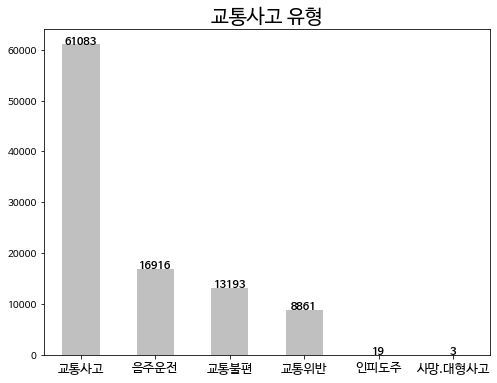

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
temp.plot(kind='bar', color='silver')
plt.title('교통사고 유형', fontsize=20)
plt.xticks(rotation=0, fontsize=13)
for i, v in enumerate(temp):
    plt.text(i, v+1, str(v), ha='center', fontweight='bold', fontsize=11)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


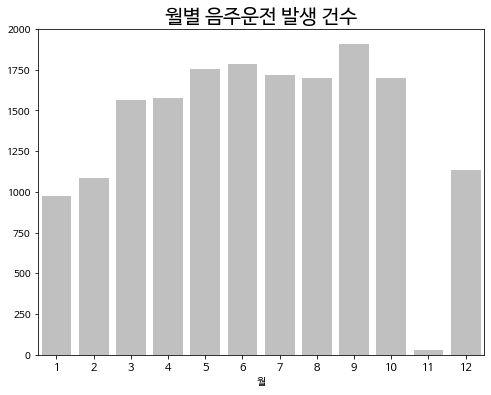

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('월별 음주운전 발생 건수', fontsize=20)
sns.countplot("월", data = dff[dff["사건"]==1], color='silver')
plt.ylabel('')
plt.xticks(fontsize=11)
plt.show()

In [ ]:
dff[dff['휴일'] == 1]

2020년 12월 ~ 2022년 2월까지
* 평일 433일
* 휴일(주말+공휴일) 225일

In [ ]:
tmp = dff[dff["사건"]==1]

In [ ]:
tmp['휴일'].value_counts()

0    10154
1     6762
Name: 휴일, dtype: int64

In [ ]:
# 평일, 휴일 일일 음주운전 발생 건수
non_hol = round(10154/433,2)
hol = round(6762/225,2)
non_hol,hol

(23.45, 30.05)

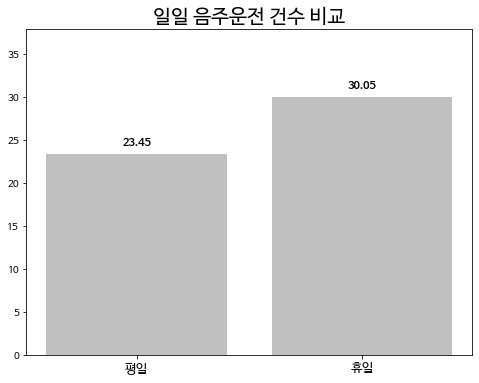

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('일일 음주운전 건수 비교', fontsize=20)

values = (23.45, 30.05)
positions = np.arange(len(values))

plt.bar(positions, values, color = 'silver')
plt.xticks(positions, ('평일', '휴일'), fontsize=13)
plt.ylim([0,38])
for i, v in enumerate(values):
    plt.text(i, v+1, str(v), ha='center', fontweight='bold', fontsize=11)

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


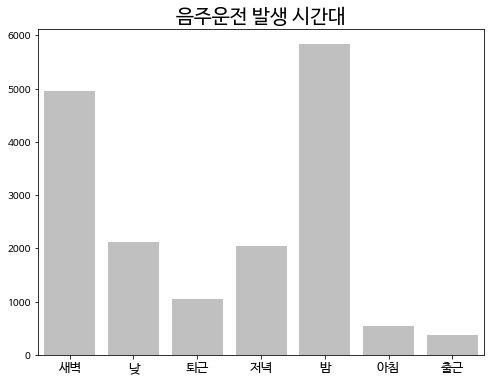

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('음주운전 발생 시간대', fontsize=20)
sns.countplot("시간대", data = dff[dff["사건"]==1], color='silver')
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=13)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


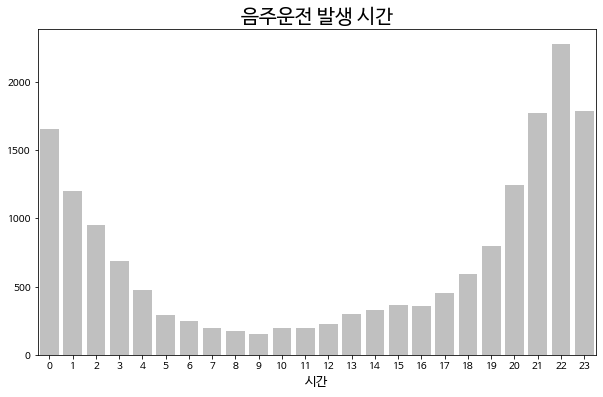

In [ ]:
plt.title('음주운전 발생 시간', fontsize=20)
plt.rcParams['figure.figsize'] = [10, 6]
sns.countplot("hour", data = dff[dff["사건"]==1], color='silver')
plt.ylabel('')
plt.xlabel('시간',fontsize=13)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


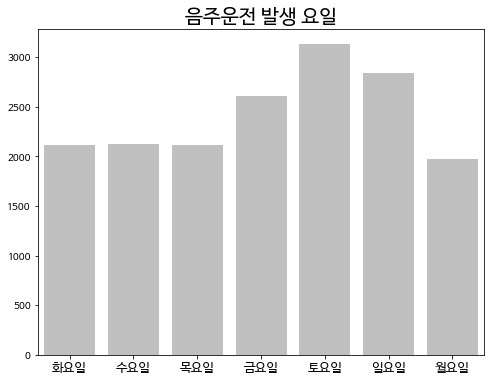

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.title('음주운전 발생 요일', fontsize=20)
plt.rcParams['figure.figsize'] = [6, 4]
sns.countplot("요일", data = dff[dff["사건"]==1], color = 'silver')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0,1,2,3,4,5,6],['화요일', '수요일', '목요일', '금요일','토요일','일요일','월요일'])
plt.xticks(fontsize=13)
plt.show()

In [ ]:
dff.corr()

,x,y,hour,주말,공휴일,휴일,중분류_인구수,중분류_주점개수,교통안전지수,도로환경,월,중분류_차량대수,사건
x,1.000000,-0.496895,0.004847,-0.033312,-0.028966,-0.039396,0.282494,-0.046897,0.426074,0.464952,-0.017750,0.210749,-0.093546
y,-0.496895,1.000000,-0.007947,0.018088,0.008983,0.020383,0.369527,0.678208,-0.639219,-0.623710,0.007206,0.452236,0.087616
hour,0.004847,-0.007947,1.000000,-0.039873,-0.003147,-0.039416,-0.008835,-0.010313,-0.000382,-0.000862,0.014034,-0.009528,-0.031350
주말,-0.033312,0.018088,-0.039873,1.000000,0.010351,0.917063,0.002555,0.014052,-0.016352,-0.016337,-0.019814,0.004434,0.069946
공휴일,-0.028966,0.008983,-0.003147,0.010351,1.000000,0.342610,-0.012985,-0.000018,-0.010034,-0.010238,0.059448,-0.010861,0.029181
휴일,-0.039396,0.020383,-0.039416,0.917063,0.342610,1.000000,-0.001683,0.013382,-0.019140,-0.019427,-0.005960,0.000856,0.077396
중분류_인구수,0.282494,0.369527,-0.008835,0.002555,-0.012985,-0.001683,1.000000,0.851652,-0.322546,-0.269600,-0.011348,0.992015,-0.003305
중분류_주점개수,-0.046897,0.678208,-0.010313,0.014052,-0.000018,0.013382,0.851652,1.000000,-0.549017,-0.458904,-0.001682,0.899927,0.048080
교통안전지수,0.426074,-0.639219,-0.000382,-0.016352,-0.010034,-0.019140,-0.322546,-0.549017,1.000000,0.969115,-0.001695,-0.375045,-0.062132
도로환경,0.464952,-0.623710,-0.000862,-0.016337,-0.010238,-0.019427,-0.269600,-0.458904,0.969115,1.000000,-0.002993,-0.324607,-0.065703


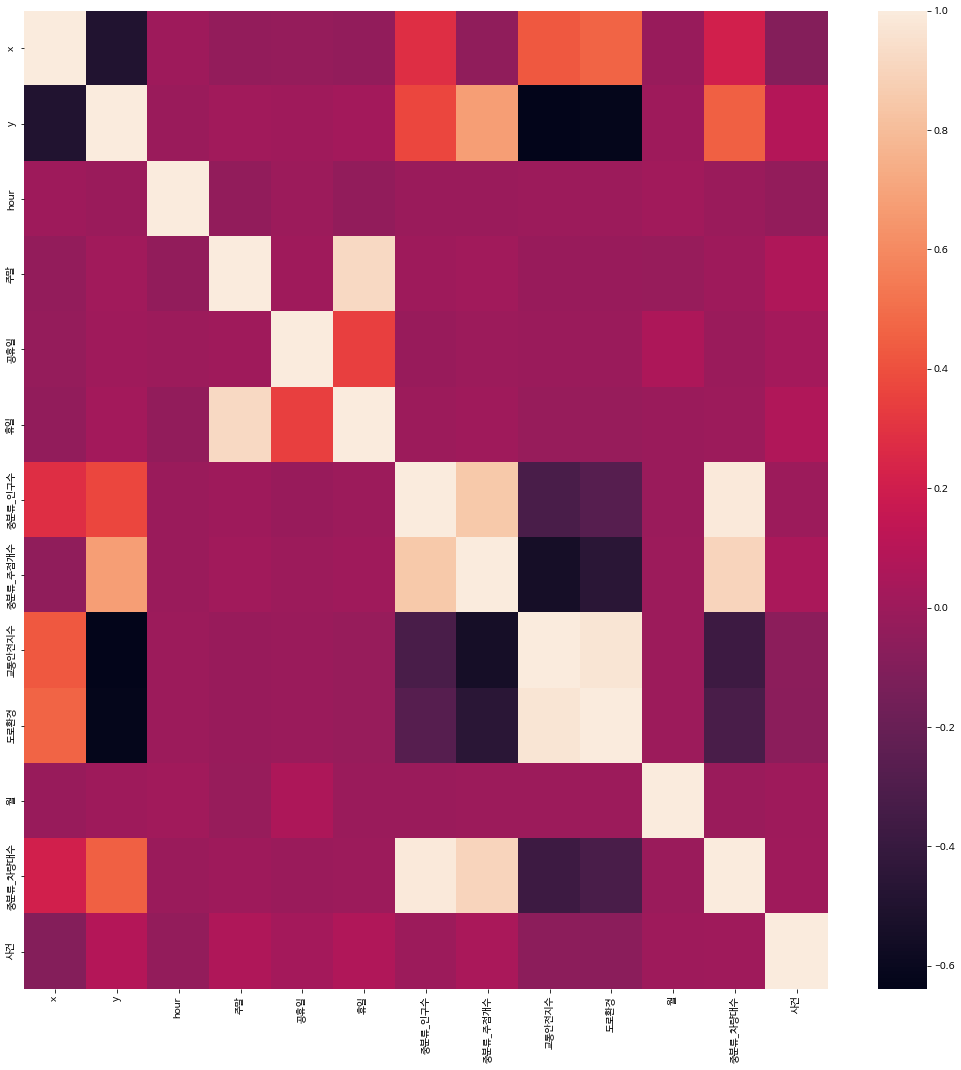

In [ ]:
plt.figure(figsize=(18,18))
corr = dff.corr()
sns.heatmap(corr)

In [ ]:
a = dff[dff.사건 == 1].groupby('중분류').count()['사건']

In [ ]:
# 음주운전 발생한
pre = dff[dff.사건 == 1].groupby('중분류').mean()[['중분류_인구수', '중분류_주점개수', '교통안전지수', '도로환경', '중분류_차량대수']]

In [ ]:
district = pd.concat([a,pre],axis=1)

In [ ]:
district

,사건,중분류_인구수,중분류_주점개수,교통안전지수,도로환경,중분류_차량대수
중분류,,,,,,
가람동,22,18335.0,0.0,81.25,83.95,8654.0
계룡시,108,44328.0,22.0,84.05,86.09,24929.0
고운동,51,35076.0,0.0,81.25,83.95,16905.0
공주시,914,102651.0,85.0,80.89,82.61,58916.0
금남면,148,8699.0,9.0,81.25,83.95,5393.0
금산군,166,50092.0,23.0,82.71,82.70,31863.0
나성동,76,39636.0,0.0,81.25,83.95,20103.0
논산시,602,112842.0,82.0,76.14,72.62,65222.0
누리동,4,8704.0,0.0,81.25,83.95,4109.0


In [ ]:
district.rename(columns = {"사건":'음주운전_건수'}, inplace=True)

In [ ]:
district.corr()

,음주운전_건수,중분류_인구수,중분류_주점개수,교통안전지수,도로환경,중분류_차량대수
음주운전_건수,1.000000,0.941451,0.969459,-0.565885,-0.569664,0.960611
중분류_인구수,0.941451,1.000000,0.897099,-0.459977,-0.469831,0.994482
중분류_주점개수,0.969459,0.897099,1.000000,-0.624809,-0.624204,0.928454
교통안전지수,-0.565885,-0.459977,-0.624809,1.000000,0.977285,-0.499461
도로환경,-0.569664,-0.469831,-0.624204,0.977285,1.000000,-0.514195
중분류_차량대수,0.960611,0.994482,0.928454,-0.499461,-0.514195,1.000000


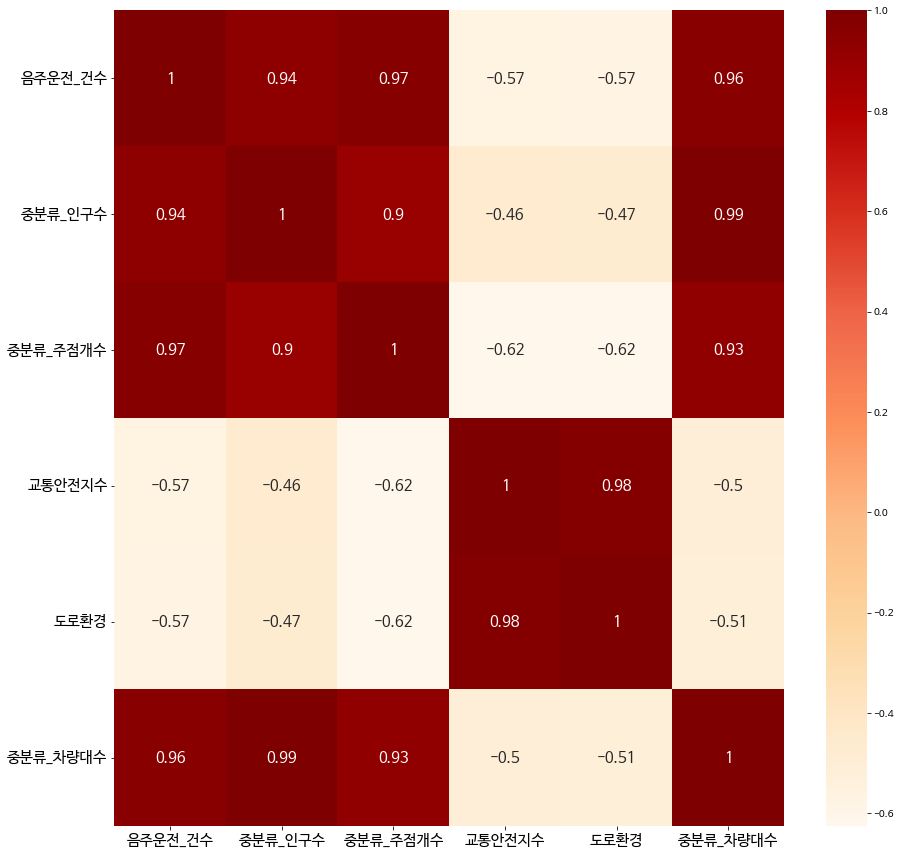

In [ ]:
plt.figure(figsize=(15,15))
corr = district.corr()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = sns.heatmap(corr, cmap='OrRd', annot=True, annot_kws={"size": 15})
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()